# Programming Assignment #3

<font color="red"> <b> Due: May 9  EOD</b> </font>

<font color="blue"> Rahul Shinde </font>
<font color="blue"> 50379771 </font>
<font color="blue"> rahuljag@buffalo.edu </font>

# I. Introduction

Describe the objective of this assignment. You can briefly state how you accompilsh it.

# II. Data

You may choose one of the following three datasets to work on. Introduce your data and visualize them. Describe your observations about the data. 
1. https://archive.ics.uci.edu/ml/datasets/covertype
2. https://archive.ics.uci.edu/ml/datasets/cnae-9
3. https://archive.ics.uci.edu/ml/datasets/Activity+recognition+using+wearable+physiological+measurements (DL Link - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6960825/bin/sensors-19-05524-s001.zip )


# III. Method

In the earlier assignment you had to implement Least Mean Square Classifier, Fisher Linear Discriminant, Perceptron,logistic regression, and Neural Network. In this assignment your tasks are the followings:

1. Implement both SVM and Kernel SVM and report the classification performance of the classifiers on the original dataset.
2. Use PCA to reduce the feature representation to a more compact version that may be of size: 10%, 15%, 20%, 25%, and 30% of the originial dataset dimension.
3. Compare the performance of the classifier using the PCA reduced descriptor and the original feature descriptor.

Do not forget to explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 

Each implementation will be followed by a separate markdown cell that should include
 - your implementation description
 - Review of the classification model implemented.
 - Plots or metrics to show the performance of the algorithm


### Grading Rubric (100 Points)
1. Loading dataset, preprocessing, splitting and visualization- 15 Points
2. SVM - 20 Points
3. Kernel SVM - 20 Points
4. PCA Dimensionality Reduction - 25 Points
5. SVM and Kernel SVM using PCA reduced features - 10 Points
6. Results Comparison - 10 Points


### Method

In [45]:
# Importing utility Librarise
import numpy as np
import abc
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

##your method implementation goes here

## Loading dataset

In [2]:
data = pd.read_csv('covtype.data', header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


## Data Information and Description

In [3]:
data.info

<bound method DataFrame.info of           0    1   2    3    4     5    6    7    8     9   ...  45  46  47  \
0       2596   51   3  258    0   510  221  232  148  6279  ...   0   0   0   
1       2590   56   2  212   -6   390  220  235  151  6225  ...   0   0   0   
2       2804  139   9  268   65  3180  234  238  135  6121  ...   0   0   0   
3       2785  155  18  242  118  3090  238  238  122  6211  ...   0   0   0   
4       2595   45   2  153   -1   391  220  234  150  6172  ...   0   0   0   
...      ...  ...  ..  ...  ...   ...  ...  ...  ...   ...  ...  ..  ..  ..   
581007  2396  153  20   85   17   108  240  237  118   837  ...   0   0   0   
581008  2391  152  19   67   12    95  240  237  119   845  ...   0   0   0   
581009  2386  159  17   60    7    90  236  241  130   854  ...   0   0   0   
581010  2384  170  15   60    5    90  230  245  143   864  ...   0   0   0   
581011  2383  165  13   60    4    67  231  244  141   875  ...   0   0   0   

        48  49  50 

In [4]:
data.index

RangeIndex(start=0, stop=581012, step=1)

## Providing Column names

In [5]:
cols = ["Elevation","Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology" , "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]

In [6]:
SoilType = [] # there are 40 of them 
for i in range(1,41):
    soil = 'Soil_Type' + str(i)
    SoilType.append(soil)
print(SoilType)    

['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


In [7]:
WildernessArea = []
for i in range(1, 5): # they are 5 of them
    warea =  "Wilderness_Area" +str(i)
    WildernessArea.append(warea)
print(WildernessArea)    

['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']


In [8]:
Covertype = ["Cover_Type"] # target column
cols = cols + WildernessArea + SoilType + Covertype
print(cols)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']


In [9]:
data1  = pd.read_csv('covtype.data',sep = ',', names = cols)
data1

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [11]:
data1.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [12]:
data1 = data1.drop(data1.index[0:481011])
data1.index

Int64Index([481011, 481012, 481013, 481014, 481015, 481016, 481017, 481018,
            481019, 481020,
            ...
            581002, 581003, 581004, 581005, 581006, 581007, 581008, 581009,
            581010, 581011],
           dtype='int64', length=100001)

## Checking for the null values in the dataset

In [13]:
data1.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


## Data types in the Dataset

In [14]:
data1.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

## Missing or Null values in the datasat values in the dataset 

In [15]:
data1.isnull()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
481011,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
481012,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
481013,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
481014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
481015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581008,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581009,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581010,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## How features are correlated to each other?

#### Gaps between the plot are missing data. I just took only 1/4 the data. Darkest region on the plot shows the strong correlation.

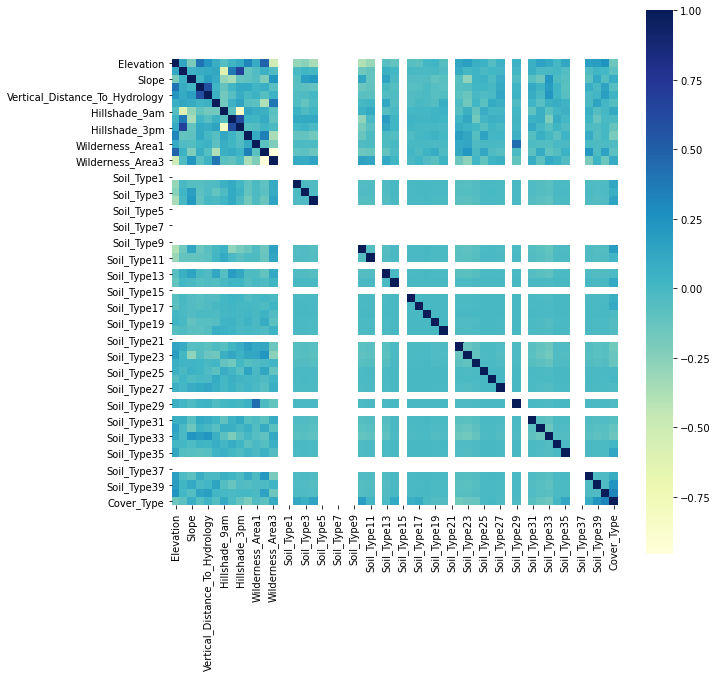

In [16]:
corr = data1.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, square = True, cmap="YlGnBu", ax =ax);

## Unique values in the Target variable i.e How many classes are there

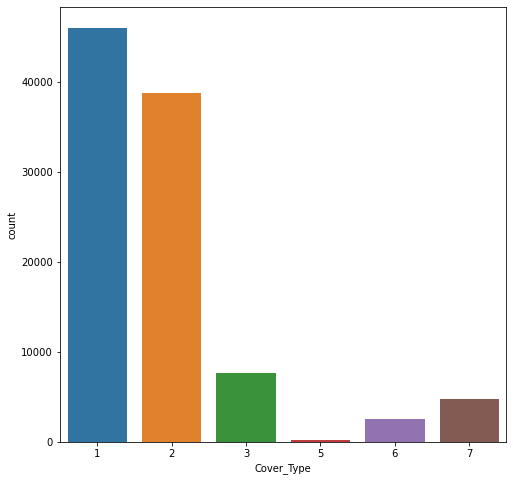

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x=data1.Cover_Type, data=data1, ax = ax);

## Creating Training and Testing Dataset 

In [18]:
X = data1.drop(['Cover_Type'], axis = 1 )
y = data1['Cover_Type']

In [19]:
len(X)

100001

In [20]:
y

481011    1
481012    1
481013    1
481014    1
481015    1
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 100001, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70000, 54), (30001, 54), (70000,), (30001,))

## Building SVM and SVM Kernel Model. 

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
SVM = svm.SVC(cache_size = 12000)
SVM.fit(X_train, y_train)
pred_SVM = SVM.predict(X_test)
print('The accuracy for the SVM is',metrics.accuracy_score(pred_SVM,y_test))

The accuracy for the SVM is 0.8765707809739676


In [24]:
print('The Classification Report for the SVM is :')
print()
print( metrics.classification_report(pred_SVM,y_test))

The Classification Report for the SVM is :

              precision    recall  f1-score   support

           1       0.93      0.88      0.90     14825
           2       0.83      0.88      0.86     10904
           3       0.85      0.88      0.86      2138
           5       0.00      0.00      0.00         0
           6       0.63      0.69      0.66       693
           7       0.93      0.90      0.91      1441

    accuracy                           0.88     30001
   macro avg       0.69      0.71      0.70     30001
weighted avg       0.88      0.88      0.88     30001



C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


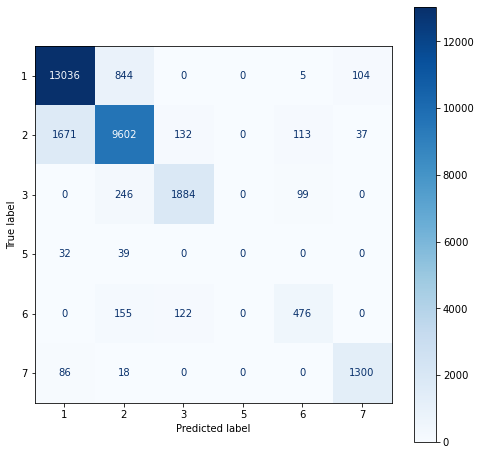

In [25]:
ig, ax = plt.subplots(figsize=(8, 8))
SVM_cm = metrics.plot_confusion_matrix(SVM, X_test, y_test,ax=ax,cmap=plt.cm.Blues)

In [26]:
SVM_kernel = svm.SVC( kernel='linear', cache_size = 12000)
SVM_kernel.fit(X_train, y_train)
pred_SVM_kernel = SVM_kernel.predict(X_test)
print('The accuracy for the SVM Kernel is',metrics.accuracy_score(pred_SVM_kernel,y_test))

The accuracy for the SVM is 0.7422419252691577


In [27]:
print('The Classification Report for the Kernel SVM is :')
print()
print( metrics.classification_report(pred_SVM_kernel,y_test))

The Classification Report for the Kernel SVM is :

              precision    recall  f1-score   support

           1       0.81      0.75      0.78     15176
           2       0.66      0.71      0.68     10600
           3       0.77      0.83      0.80      2068
           5       0.00      0.00      0.00         0
           6       0.57      0.60      0.58       710
           7       0.86      0.84      0.85      1447

    accuracy                           0.74     30001
   macro avg       0.61      0.62      0.62     30001
weighted avg       0.75      0.74      0.74     30001



C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


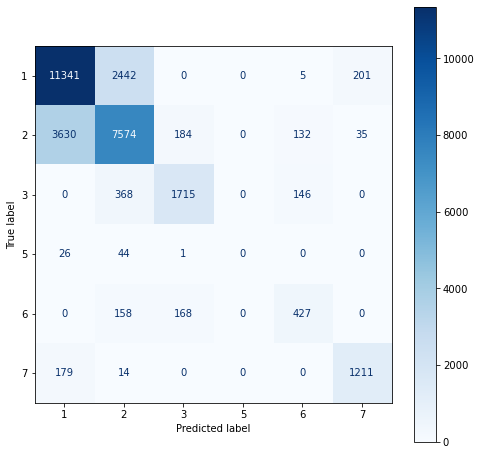

In [28]:
ig, ax = plt.subplots(figsize=(8, 8))
SVM_cm = metrics.plot_confusion_matrix(SVM_kernel, X_test, y_test, ax=ax,cmap=plt.cm.Blues)

## Applying PCA for Dimentionality reduction

In [36]:
pca = PCA(n_components = 40)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

## Using Reduced Data on SVM AND Kernel SVM

In [37]:
SVM_PCA = svm.SVC(cache_size = 12000)
SVM_PCA.fit(X_train_pca, y_train)
pred_SVM_PCA = SVM_PCA.predict(X_test_pca)
print('The accuracy for the SVM with PCA is',metrics.accuracy_score(pred_SVM_PCA,y_test))

The accuracy for the SVM with PCA is 0.5001499950001667


In [38]:
print('The Classification Report for the SVM with PCA is :')
print()
print( metrics.classification_report(pred_SVM_PCA,y_test))

The Classification Report for the SVM with PCA is :

              precision    recall  f1-score   support

           1       0.55      0.58      0.56     13405
           2       0.60      0.44      0.51     15715
           3       0.00      0.01      0.00       277
           5       0.00      0.00      0.00         0
           6       0.01      0.33      0.02        21
           7       0.22      0.54      0.32       583

    accuracy                           0.50     30001
   macro avg       0.23      0.32      0.23     30001
weighted avg       0.57      0.50      0.53     30001



C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
SVM_kernel_pca = svm.SVC( kernel='linear', cache_size = 12000)
SVM_kernel_pca.fit(X_train, y_train)
pred_SVM_kernel_pca = SVM_kernel.predict(X_test)
print('The accuracy for the SVM Kernel With Dimension reduction is',metrics.accuracy_score(pred_SVM_kernel_pca,y_test))

The accuracy for the SVM Kernel With Dimension reduction is 0.7422419252691577


In [ ]:
print('The Classification Report for the SVM with PCA is :')
print()
print( metrics.classification_report(pred_SVM_PCA,y_test))

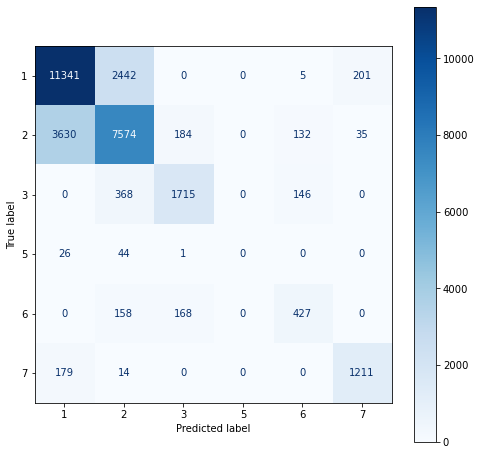

In [40]:
ig, ax = plt.subplots(figsize=(8, 8))
SVM_cm_pca = metrics.plot_confusion_matrix(SVM_kernel_pca, X_test, y_test,ax=ax,cmap=plt.cm.Blues)

In [41]:
acc_model = {'Accuracies':[87.65,74.22,50.01,74.22], "Models": ['SVM','SVM Kernel','SVM PCA','SVM Kernel PCA']}
accDataframe = pd.DataFrame(data = acc_model)
accDataframe

,Accuracies,Models
0,87.65,SVM
1,74.22,SVM Kernel
2,50.01,SVM PCA
3,74.22,SVM Kernel PCA


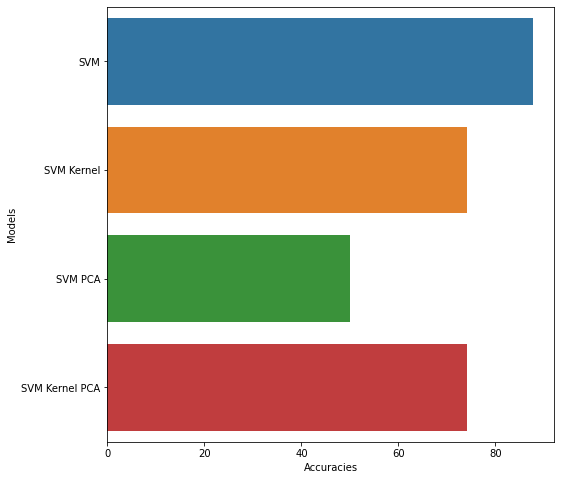

In [43]:
 fig, ax = plt.subplots(figsize=(8, 8))
 sns.barplot(x="Accuracies", y="Models", data=accDataframe,  ax = ax);

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

# Conclusions

### From the comparison we can see that simple SVM model with default parameters preformed best. However it takes a lot of computational power to train this models, but can be minimised by using some parameters like cache_size. I learned how to built plot.sklearn library to see classification report, confution matrix and accuracy score to evaluate a model. I got some error while labling the classes in the Cove_type column,hence proceeded without it I will figure out that later.

# References

In [44]:
#sklearn